In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
%matplotlib inline

In [16]:
df = pd.read_csv('wine.csv',header=None)

In [17]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [18]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

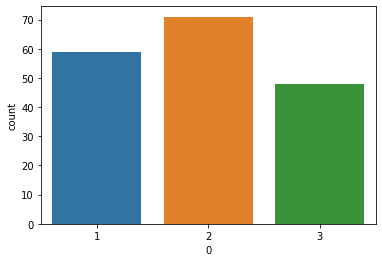

In [19]:
sns.countplot(df[0])

In [20]:
X = df.drop(0, axis=1)
y = df[0]

In [21]:
X.head().to_numpy()

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

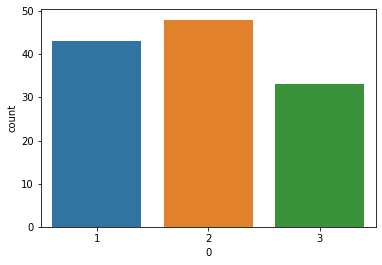

In [24]:
sns.countplot(y_train)

In [25]:
baseline = [y_train.value_counts().idxmax() for x in range(len(y_test))]

In [26]:
print(baseline)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [35]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)
log_reg_pred = lr.predict(X_test)
print(classification_report(y_test, log_reg_pred))
print(confusion_matrix(y_test, log_reg_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[[21  0  0]
 [ 0 21  0]
 [ 0  0 12]]


In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred= rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%('rfc', acc))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of %s is %s"%('rfc', cm))
print(f'\n {classification_report(y_test, y_pred)} \n')

Accuracy of rfc is 0.9814814814814815
Confusion Matrix of rfc is [[21  0  0]
 [ 0 20  1]
 [ 0  0 12]]

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.98        21
           3       0.92      1.00      0.96        12

    accuracy                           0.98        54
   macro avg       0.97      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54
 



In [46]:
print(classification_report(y_test, baseline))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.39      1.00      0.56        21
           3       0.00      0.00      0.00        12

    accuracy                           0.39        54
   macro avg       0.13      0.33      0.19        54
weighted avg       0.15      0.39      0.22        54



In [54]:
filename = 'wine.csv'
df = pd.read_csv(filename, header=None)


X = df.drop(0, axis=1)
y = df[0]

## Crossvalidation
# Create crossvalidation partition for evaluation
K1 = 10
K2 = 10
CV = model_selection.KFold(n_splits=K1, shuffle=True)


k=0
iii = 0
for train_index, test_index in CV.split(X):
    print('iii is:')
    print(iii) 
    
    print (train_index)
        
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    k_scores = []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = model_selection.cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
        print(k)
        
    print(k_scores.index(max(k_scores)), max(k_scores), ' : ', k_scores)

iii is:
0
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18
  19  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  49  51  52  53  54  55  56  57  58
  60  61  63  64  65  66  68  69  70  71  72  74  75  76  77  78  79  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 136 138
 139 140 141 142 143 144 145 146 147 148 149 151 152 155 156 157 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 176 177]


KeyError: '[0, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177] not in index'

In [ ]:
## Crossvalidation
# Create crossvalidation partition for evaluation
K1 = 5
K2 = 5
CV = model_selection.KFold(K1, shuffle=True)
#CV = model_selection.KFold(K, shuffle=False)

# Values of lambda
#lambdas = np.power(10.,range(-5,9))
lambdas = [0.0001,0.001, 0.01,0.1,1,10,20,30,40,100,1000,10000]
#lambdas = np.power(10.,np.arange(-5,9,0.3))

# Initialize variables
#T = len(lambdas)
Error_train = np.empty((K2,K1))
Error_test = np.empty((K2,K1))
Error_train_rlr = np.empty((K2,K1))
Error_test_rlr = np.empty((K2,K1))
Error_train_nofeatures = np.empty((K2,K1))
Error_test_nofeatures = np.empty((K2,K1))
w_rlr = np.empty((M,K1))
#mu = np.empty((K1, M-1))
#sigma = np.empty((K1, M-1))
#w_noreg = np.empty((M,K1))


ANN_error = np.empty([K2,number_of_ANN_modelse]) #10 is for crossvaidation and 3 is for ANN models
ANN_best_error = np.empty([K2,1])
optimal_h_array = np.empty((K2,1))


optimal_lambda_array = np.empty((K2))
dummy_optimal_lambda_array = np.empty((K2))

Error_test_ANN = np.empty([K1])
Error_test_lin_reg = np.empty([K1])
Error_test_baseline = np.empty([K1])

#For statistics
CI_ab = np.empty([K1,2]) 
p_ab = np.empty([K1,1])
CI_ac = np.empty([K1,2]) 
p_ac = np.empty([K1,1])
CI_bc = np.empty([K1,2]) 
p_bc = np.empty([K1,1])

k=0
iii = 0
for train_index_outer, test_index_outer in CV.split(X,y):
    print('iii is:')
    print(iii) 
    # extract training and test set for current CV fold
    X_train_outer = X[train_index_outer]
    y_train_outer = y[train_index_outer]
    X_test_outer = X[test_index_outer]
    y_test_outer = y[test_index_outer]
        
    for train_index_inner, test_index_inner in CV.split(X_train_outer,y_train_outer):
        
        # extract training and test set for current CV fold
        X_train_inner = X[train_index_inner]
        y_train_inner = y[train_index_inner]
        X_test_inner = X[test_index_inner]
        y_test_inner = y[test_index_inner]
        internal_cross_validation = 10    
        
        ######## "The s for loop" where each model is trained
        opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train_inner, y_train_inner, lambdas, internal_cross_validation)
        
            # Extract training and test set for current CV fold, convert to tensors
        X_train_ANN = torch.Tensor(X_train_inner) # X[train_index,:])
        y_train_ANN = torch.Tensor(y_train_inner) # y[train_index])
        X_test_ANN = torch.Tensor(X_test_inner) # X[test_index,:])
        y_test_ANN = torch.Tensor(y_test_inner) # y[test_index])
        
        ###################
        ### ANN model 1 ###
        ###################
        # Train the net on training data
        net_m1, final_loss, learning_curve = train_neural_net(ANN_model_1,
                                                           loss_fn_1,
                                                           X=X_train_ANN,
                                                           y=y_train_ANN,
                                                           n_replicates=n_replicates,
                                                           max_iter=max_iter)
        
        print('\n\t M1 Best loss: {}\n'.format(final_loss))
        
        # Determine estimated class labels for test set        
        y_test_est_m1 = net_m1(X_test_ANN).detach().numpy() ### 
        # Determine Mean square error      
        mse = np.square(y_test_inner-np.squeeze(y_test_est_m1)).sum(axis=0)/y_test_inner.shape[0]
        # Save it
        ANN_error[k,0] = mse  # np.asarray(mse)
       
        
        ### ANN model 2
        # Train the net on training data
        net_m2, final_loss, learning_curve = train_neural_net(ANN_model_2,
                                                           loss_fn_2,
                                                           X=X_train_ANN,
                                                           y=y_train_ANN,
                                                           n_replicates=n_replicates,
                                                           max_iter=max_iter)
        
        print('\n\t M2 Best loss: {}\n'.format(final_loss))
        
       # Determine estimated class labels for test set        
        y_test_est_m2 = net_m2(X_test_ANN).detach().numpy() ### 
        # Determine Mean square error      
        mse = np.square(y_test_inner-np.squeeze(y_test_est_m2)).sum(axis=0)/y_test_inner.shape[0]
        # Save it
        ANN_error[k,1] = mse  # np.asarray(mse)
       
        
        ### ANN model 3
        # Train the net on training data
        net_m3, final_loss, learning_curve = train_neural_net(ANN_model_3,
                                                           loss_fn_3,
                                                           X=X_train_ANN,
                                                           y=y_train_ANN,
                                                           n_replicates=n_replicates,
                                                           max_iter=max_iter)
        
        print('\n\t M3 Best loss: {}\n'.format(final_loss))
         # Determine estimated class labels for test set        
        y_test_est_m3 = net_m3(X_test_ANN).detach().numpy() ### 
        # Determine Mean square error      
        mse = np.square(y_test_inner-np.squeeze(y_test_est_m3)).sum(axis=0)/y_test_inner.shape[0]
        # Save it
        ANN_error[k,2] = mse  # np.asarray(mse)
       
        ### ANN model 4
        # Train the net on training data
        net_m4, final_loss, learning_curve = train_neural_net(ANN_model_4,
                                                           loss_fn_4,
                                                           X=X_train_ANN,
                                                           y=y_train_ANN,
                                                           n_replicates=n_replicates,
                                                           max_iter=max_iter)
        
        print('\n\t M4 Best loss: {}\n'.format(final_loss))
         # Determine estimated class labels for test set        
        y_test_est_m4 = net_m4(X_test_ANN).detach().numpy() ### 
        # Determine Mean square error      
        mse = np.square(y_test_inner-np.squeeze(y_test_est_m4)).sum(axis=0)/y_test_inner.shape[0]
        # Save it
        ANN_error[k,3] = mse  # np.asarray(mse)
        
        
        
        # Standardize outer fold based on training set, and save the mean and standard
        # deviations since they're part of the model (they would be needed for
        # making new predictions) - for brevity we won't always store these in the scripts
        #Uncommented these 4 lines (TK)
        #mu[k, :] = np.mean(X_train[:, 1:], 0)
        #sigma[k, :] = np.std(X_train[:, 1:], 0)
        
        #X_train[:, 1:] = (X_train[:, 1:] - mu[k, :] ) / sigma[k, :] 
        #X_test[:, 1:] = (X_test[:, 1:] - mu[k, :] ) / sigma[k, :] 
        
        Xty = X_train_inner.T @ y_train_inner
        XtX = X_train_inner.T @ X_train_inner
        
        # Compute mean squared error without using the input data at all - The base line model
        Error_train_nofeatures[k] = np.square(y_train_inner-y_train_inner.mean()).sum(axis=0)/y_train_inner.shape[0]
        Error_test_nofeatures[k] = np.square(y_test_inner-y_test_inner.mean()).sum(axis=0)/y_test_inner.shape[0]
    
        # Estimate weights for the optimal value of lambda, on entire training set
        lambdaI = opt_lambda * np.eye(M)
        lambdaI[0,0] = 0 # Do no regularize the bias term
        w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
        # Compute mean squared error with regularization with optimal lambda
        Error_train_rlr[k,iii] = np.square(y_train_inner-X_train_inner @ w_rlr[:,k]).sum(axis=0)/y_train_inner.shape[0]
        Error_test_rlr[k,iii] = np.square(y_test_inner-X_test_inner @ w_rlr[:,k]).sum(axis=0)/y_test_inner.shape[0]
        
        dummy_optimal_lambda_array[k] = opt_lambda
        
        
    
        
    
        k+=1
    
    #TK:
    
    #Pick out the best ANN model
    index_dummy = np.where(ANN_error == np.amin(ANN_error)) #Minimun index, to safe h*
    optimal_h_array[iii] = index_dummy[1]
    
    
        
    # Extract training and test set for current CV fold, convert to tensors
    X_train_outer_ANN = torch.Tensor(X_train_outer) # X[train_index,:])
    y_train_outer_ANN = torch.Tensor(y_train_outer) # y[train_index])
    X_test_outer_ANN = torch.Tensor(X_test_outer) # X[test_index,:])
    y_test_outer_ANN = torch.Tensor(y_test_outer) # y[test_index])

#Train the best model on the training set -- this could have been done in a nicer way... But python dont have switch case and I dont want to make a model array :p
    if index_dummy[1] == 0:
        net_m_final, final_loss, learning_curve = train_neural_net(ANN_model_1,
                                                           loss_fn_1,
                                                           X=X_train_outer_ANN,
                                                           y=y_train_outer_ANN,
                                                           n_replicates=n_replicates,
                                                           max_iter=max_iter)
        
        print('\n\t M1 Best loss: {}\n'.format(final_loss))
    elif index_dummy[1] == 1:
        net_m_final, final_loss, learning_curve = train_neural_net(ANN_model_2,
                                                           loss_fn_2,
                                                           X=X_train_outer_ANN,
                                                           y=y_train_outer_ANN,
                                                           n_replicates=n_replicates,
                                                           max_iter=max_iter)
        
        print('\n\t M2 Best loss: {}\n'.format(final_loss))
    elif index_dummy[1] == 2:
        net_m_final, final_loss, learning_curve = train_neural_net(ANN_model_3,
                                                           loss_fn_3,
                                                           X=X_train_outer_ANN,
                                                           y=y_train_outer_ANN,
                                                           n_replicates=n_replicates,
                                                           max_iter=max_iter)
        
        print('\n\t M3 Best loss: {}\n'.format(final_loss))
    elif index_dummy[1] == 3:
        net_m_final, final_loss, learning_curve = train_neural_net(ANN_model_4,
                                                           loss_fn_4,
                                                           X=X_train_outer_ANN,
                                                           y=y_train_outer_ANN,
                                                           n_replicates=n_replicates,
                                                           max_iter=max_iter)
        
        print('\n\t M4 Best loss: {}\n'.format(final_loss))
    
    # Determine estimated class labels for test set        
    y_test_est_m_final = net_m_final(X_test_outer_ANN).detach().numpy() ### 
    # Determine Mean square error      
    mse = np.square(y_test_outer-np.squeeze(y_test_est_m_final)).sum(axis=0)/y_test_outer.shape[0]
    #Save the error
    Error_test_ANN[iii] = mse #Minimum value 
    
    #### Linear regression model
    #Pick out the best optimal lambda value
    min_lambda_index = np.where(Error_test_rlr[:,iii] == np.amin(Error_test_rlr[:,iii]))
    optimal_lambda_array[iii] = dummy_optimal_lambda_array[min_lambda_index]
    #Train the model:
    Xty = X_train_outer.T @ y_train_outer
    XtX = X_train_outer.T @ X_train_outer

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = optimal_lambda_array[iii] * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    w_rlr_o = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    # Compute mean squared error with regularization with optimal lambda
    #Error_train_rlr[k,iii] = np.square(y_train_outer-X_train_outer@ w_rlr_o).sum(axis=0)/y_train_outer.shape[0]
    Error_test_lin_reg[iii] = np.square(y_test_outer-X_test_outer @ w_rlr_o).sum(axis=0)/y_test_outer.shape[0]
    
    #### Base line model
     # Compute mean squared error - The base line model
    Error_test_baseline[iii] = np.square(y_test_outer-y_train_outer.mean()).sum(axis=0)/y_test_outer.shape[0]
    
    #Do the statistic evaluation. A is linear regression, B is ANN and C is baseline
    yhatA = X_test_outer @ w_rlr_o
    zA = np.abs(y_test_outer - yhatA ) ** 2
    # yhatB = y_test_est_m_final
    zB = np.abs(y_test_outer - np.squeeze(y_test_est_m_final) ) ** 2
    # yhatC = y_train_outer.mean()
    zC = np.abs(y_test_outer - y_train_outer.mean() ) ** 2
    
    alpha = 0.05
    #Compare linear regression with ANN
    z_ab = zA - zB
    CI_ab[iii,:] = st.t.interval(1-alpha, len(z_ab)-1, loc=np.mean(z_ab), scale=st.sem(z_ab))  # Confidence interval
    p_ab[iii] = st.t.cdf( -np.abs( np.mean(z_ab) )/st.sem(z_ab), df=len(z_ab)-1)  # p-value
    #Compare linear regression with base line
    z_ac = zA - zC
    CI_ac[iii,:] = st.t.interval(1-alpha, len(z_ac)-1, loc=np.mean(z_ac), scale=st.sem(z_ac))  # Confidence interval
    p_ac[iii] = st.t.cdf( -np.abs( np.mean(z_ac) )/st.sem(z_ac), df=len(z_ac)-1)  # p-value
    #Compare ANN with base line
    z_bc = zB - zC
    CI_bc[iii,:] = st.t.interval(1-alpha, len(z_bc)-1, loc=np.mean(z_bc), scale=st.sem(z_bc))  # Confidence interval
    p_ac[iii] = st.t.cdf( -np.abs( np.mean(z_bc) )/st.sem(z_bc), df=len(z_bc)-1)  # p-value
  #  Error_test_ANN[iii]
   # Error_test_lin_reg[iii]
   # Error_test_baseline[iii]
    
    iii+=1
    k = 0
    
    
        # Estimate weights for unregularized linear regression, on entire training set
        #w_noreg[:,k] = np.linalg.solve(XtX,Xty).squeeze()
        # Compute mean squared error without regularization
        #Error_train[k] = np.square(y_train-X_train @ w_noreg[:,k]).sum(axis=0)/y_train.shape[0]
        #Error_test[k] = np.square(y_test-X_test @ w_noreg[:,k]).sum(axis=0)/y_test.shape[0]
        # OR ALTERNATIVELY: you can use sklearn.linear_model module for linear regression:
        #m = lm.LinearRegression().fit(X_train, y_train)
        #Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
        #Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]
        
        
#print(Error_test_rlr)        
        


print('Linear regression - Test error')
#print(np.mean(Error_test_rlr,axis=0))
print(Error_test_lin_reg)
print('Optimal Lambda values)')
print(optimal_lambda_array)   
print('')
print('Baseline')     
print(Error_test_baseline)
#print(np.mean(Error_test_nofeatures,axis=0))

print('')
print('ANN test error')     
#print(ANN_best_error)
print(Error_test_ANN)
print('Optimal h values)')
print(optimal_h_array)   

print('Statistics')
print('Compare linear regression with ANN')
print(CI_ab)
print(p_ab)
print('Compare linear regression with baseline')
print(CI_ac)
print(p_ac)
print('Compare ANN with baseline')
print(CI_bc)
print(p_bc)
